In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("STOCK_VAL.csv")
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization
0,09-02-2023,4626.90,4658.00,4585.00,4637.60,1722,607,7.958223e+06
1,08-02-2023,4597.05,4637.05,4578.00,4590.95,3670,906,1.690962e+07
2,07-02-2023,4630.00,4661.50,4595.95,4605.35,5979,1589,2.767515e+07
3,06-02-2023,4602.00,4634.10,4602.00,4626.60,4502,1230,2.079046e+07
4,03-02-2023,4590.00,4656.45,4571.50,4624.80,26221,4118,1.209830e+08


In [3]:
df = np.flipud(df)
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7
0,02-01-2007,112.0,112.0,109.5,109.72,1010,59,111857.5
1,03-01-2007,110.2,111.4,109.2,109.51,1139,70,125631.7
2,04-01-2007,110.0,111.8,109.0,110.13,2999,99,331089.6
3,05-01-2007,110.68,112.0,110.0,110.1,1013,72,112443.0
4,08-01-2007,109.5,113.8,109.06,110.04,1394,60,155333.42
...,...,...,...,...,...,...,...,...
3980,03-02-2023,4590.0,4656.45,4571.5,4624.8,26221,4118,120983038.475
3981,06-02-2023,4602.0,4634.1,4602.0,4626.6,4502,1230,20790461.1
3982,07-02-2023,4630.0,4661.5,4595.95,4605.35,5979,1589,27675146.775
3983,08-02-2023,4597.05,4637.05,4578.0,4590.95,3670,906,16909616.75


In [4]:
df['DATE'] = df[0]
df['OPEN'] = df[1]
df['HIGH'] = df[2]
df['LOW'] = df[3]
df['CLOSE'] = df[4]
df['NO. OF SHARES'] = df[5]
df['NO. OF TRADES'] = df[6]
df['Market Capitalization'] = df[7]
df = df.drop(df[[0,1,2,3,4,5,6,7]], axis = 'columns')
df

,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization
0,02-01-2007,112.0,112.0,109.5,109.72,1010,59,111857.5
1,03-01-2007,110.2,111.4,109.2,109.51,1139,70,125631.7
2,04-01-2007,110.0,111.8,109.0,110.13,2999,99,331089.6
3,05-01-2007,110.68,112.0,110.0,110.1,1013,72,112443.0
4,08-01-2007,109.5,113.8,109.06,110.04,1394,60,155333.42
...,...,...,...,...,...,...,...,...
3980,03-02-2023,4590.0,4656.45,4571.5,4624.8,26221,4118,120983038.475
3981,06-02-2023,4602.0,4634.1,4602.0,4626.6,4502,1230,20790461.1
3982,07-02-2023,4630.0,4661.5,4595.95,4605.35,5979,1589,27675146.775
3983,08-02-2023,4597.05,4637.05,4578.0,4590.95,3670,906,16909616.75


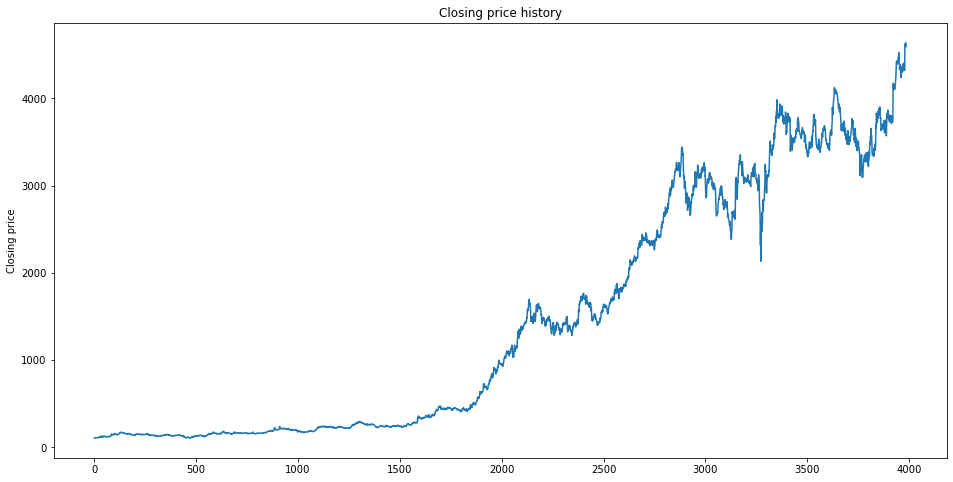

In [5]:
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(df['CLOSE'])
plt.ylabel('Closing price')
plt.show()

In [6]:
data = df.filter(['CLOSE'])

dataset = data.values

training_data_len = math.ceil( len(dataset)*(0.8))

training_data_len

3188

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[3.04685534e-04],
       [2.58320344e-04],
       [3.95208047e-04],
       ...,
       [9.92879632e-01],
       [9.89700304e-01],
       [1.00000000e+00]])

In [8]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3128, 60, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

3128/3128 [==============================] - 132s 40ms/step - loss: 6.0523e-04


In [13]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [14]:
x_test = np.array(x_test)

In [15]:
x_test

array([[0.51558312, 0.52065017, 0.53502338, ..., 0.66523229, 0.66405108,
        0.65422608],
       [0.52065017, 0.53502338, 0.56951025, ..., 0.66405108, 0.65422608,
        0.64351793],
       [0.53502338, 0.56951025, 0.57273374, ..., 0.65422608, 0.64351793,
        0.64692908],
       ...,
       [0.8973011 , 0.88924239, 0.88055444, ..., 0.98633331, 0.99717393,
        0.99757135],
       [0.88924239, 0.88055444, 0.88184604, ..., 0.99717393, 0.99757135,
        0.99287963],
       [0.88055444, 0.88184604, 0.89003722, ..., 0.99757135, 0.99287963,
        0.9897003 ]])

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

25/25 [==============================] - 3s 27ms/step


In [18]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.9937571679932227

C:\Users\Amit Jha\AppData\Local\Temp\ipykernel_24092\2134025626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['PREDICTIONS'] = predictions


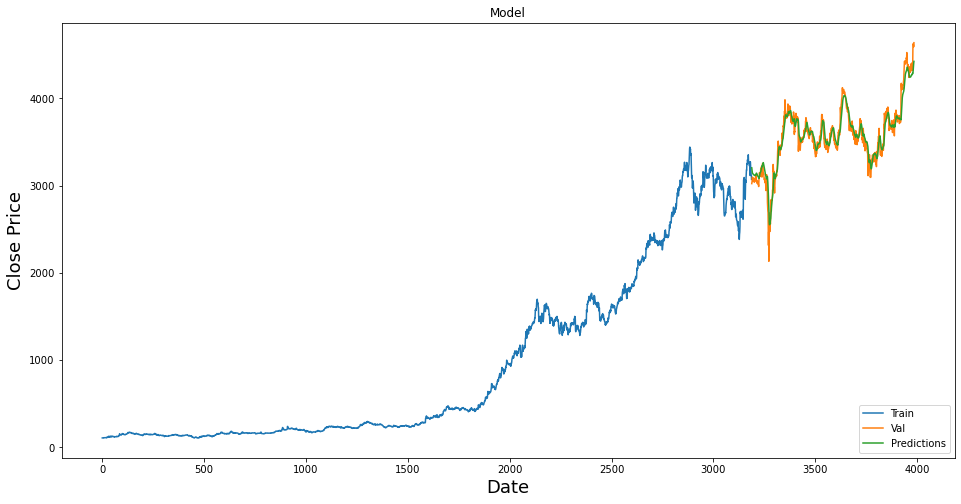

In [19]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['PREDICTIONS'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['CLOSE'])
plt.plot(valid[['CLOSE', 'PREDICTIONS']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
valid['DATE'] = df.DATE[3188:]
valid

C:\Users\Amit Jha\AppData\Local\Temp\ipykernel_24092\845364899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['DATE'] = df.DATE[3188:]


,CLOSE,PREDICTIONS,DATE
3188,3023.0,3204.389648,22-11-2019
3189,3038.45,3181.885010,25-11-2019
3190,3054.5,3161.843018,26-11-2019
3191,3091.15,3147.008057,27-11-2019
3192,3097.3,3140.400879,28-11-2019
...,...,...,...
3980,4624.8,4305.891602,03-02-2023
3981,4626.6,4339.889648,06-02-2023
3982,4605.35,4374.593262,07-02-2023
3983,4590.95,4402.941895,08-02-2023


In [24]:
len(x_test)

797

In [25]:
x_input = x_test[796].reshape(1,-1)
x_input.shape

(1, 60)

In [26]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [27]:
temp_input

[0.8805544393565395,
 0.8818460410751424,
 0.89003722462389,
 0.8885579542795071,
 0.8867033466835641,
 0.8822655356504153,
 0.8862507341155066,
 0.8938237151322732,
 0.8930951192910099,
 0.9024454325872218,
 0.9060663331316815,
 0.9216759470642004,
 0.9371199710327957,
 0.9474196667888352,
 0.9530828435550178,
 0.9482586559393807,
 0.9530386862313048,
 0.9458741604588828,
 0.9460507897537346,
 0.9501463815281084,
 0.9543744452736208,
 0.9536348101014295,
 0.949461943010558,
 0.9619695049522439,
 0.9579291098325113,
 0.9751394267496235,
 0.9712646215938143,
 0.9516808485271324,
 0.94564233450939,
 0.9320970754604505,
 0.9421318272742125,
 0.9413259561164518,
 0.9443396934598588,
 0.9372634823348626,
 0.9269306685860382,
 0.923762380609636,
 0.9120275718329263,
 0.9279462870314356,
 0.9383122187730445,
 0.9387869100029586,
 0.9318100528563165,
 0.9252637296158754,
 0.9333114018625559,
 0.9267871572839713,
 0.9398466857720686,
 0.9462936550341557,
 0.9409175008721071,
 0.929734658641809,

In [28]:
from numpy import array
lst_output = []
n_steps = 60
i = 0
while(i<30):
    
    if(len(temp_input)>60):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95273775]
61
1 day input [0.88184604 0.89003722 0.88855795 0.88670335 0.88226554 0.88625073
 0.89382372 0.89309512 0.90244543 0.90606633 0.92167595 0.93711997
 0.94741967 0.95308284 0.94825866 0.95303869 0.94587416 0.94605079
 0.95014638 0.95437445 0.95363481 0.94946194 0.9619695  0.95792911
 0.97513943 0.97126462 0.95168085 0.94564233 0.93209708 0.94213183
 0.94132596 0.94433969 0.93726348 0.92693067 0.92376238 0.91202757
 0.92794629 0.93831222 0.93878691 0.93181005 0.92526373 0.9333114
 0.92678716 0.93984669 0.94629366 0.9409175  0.92973466 0.93390753
 0.94708849 0.9469229  0.9431916  0.94942883 0.92945868 0.94076295
 0.98633331 0.99717393 0.99757135 0.99287963 0.9897003  0.95273775]
1 day output [[0.95185566]]
2 day input [0.89003722 0.88855795 0.88670335 0.88226554 0.88625073 0.89382372
 0.89309512 0.90244543 0.90606633 0.92167595 0.93711997 0.94741967
 0.95308284 0.94825866 0.95303869 0.94587416 0.94605079 0.95014638
 0.95437445 0.95363481 0.94946194 0.9619695  0.95792911 0.975

In [29]:
day_new=np.arange(1,61)
day_pred=np.arange(61,91)

In [30]:
import matplotlib.pyplot as plt

In [31]:
len(dataset)

3985

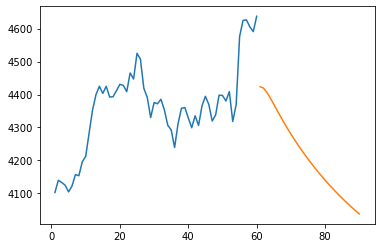

In [32]:
plt.plot(day_new,(dataset[3925:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

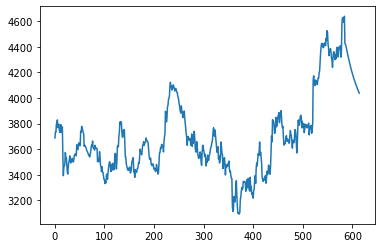

In [33]:
df3=dataset.tolist()
df3.extend(scaler.inverse_transform(lst_output))
plt.plot(df3[3400:])

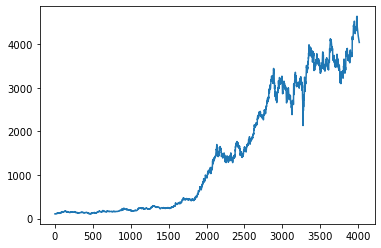

In [34]:
plt.plot(df3)